In [1]:
import numpy as np
import pylab as mplot
import astropy.io.fits as pf
%pylab inline
import scipy
from scipy import interpolate

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def extProduction(BDF_T, BDF_S2N):
    
    x = [-3.       ,  0.79891862,  0.90845217,  0.98558583,  1.05791208,
         1.13603715,  1.22479487,  1.33572223,  1.48983602,  1.74124395,
         2.43187589,  6.        ] 
    y_1 = [0.028, 0.028, 0.008, 0.   , 0.004, 0.012, 0.012, 0.004, 0.012,
           0.024, 0.04 , 0.04 ]
    y_2 = [-0.028, -0.028, -0.04 , -0.032, -0.036, -0.032, -0.028, -0.016,
           -0.012,  0.008,  0.016,  0.016]
    y_3 = [-0.1  , -0.1  , -0.1  , -0.1  , -0.1  , -0.1  , -0.1  , -0.1  ,
           -0.012,  0.008,  0.016,  0.016]
    y_4 = [0.252, 0.252, 0.188, 0.14 , 0.096, 0.104, 0.052, 0.048, 0.04 ,
           0.052, 0.088, 0.088]

    f_array = [scipy.interpolate.interp1d(x, y_1, fill_value=-99, bounds_error=False),
               scipy.interpolate.interp1d(x, y_2, fill_value=-99, bounds_error=False),
               scipy.interpolate.interp1d(x, y_3, fill_value=-99, bounds_error=False),
               scipy.interpolate.interp1d(x, y_4, fill_value=-99, bounds_error=False)]

    x_data = np.log10(BDF_S2N)
    x_data = np.where(np.isfinite(x_data), x_data, x[0])
    y_data = BDF_T.copy()
    ext = np.tile(0, len(x_data))
    for f in f_array:
        selection = (y_data > f(x_data))
        ext += selection.astype(int)
    
    # Sentinel values
    selection = np.isclose(BDF_T, -9.999e+09) | np.isclose(BDF_S2N, -9.999e+09) | (BDF_S2N <= 0.)
    ext[selection] = -9

    return np.where(np.isfinite(ext), ext, -9)

In [3]:
def sg_wavg(mag, magerr):
    return np.array(((mag+3*magerr)>0.005))*1 + np.array((mag+magerr)>0.003) *1 + np.array((mag-magerr)>0.002)*1



In [4]:
SG_wavg = np.array([])
SG_bdf = np.array([])
MAG = np.array([])
SIZE = np.array([])
ID = np.array([])
Tile = np.array([])


for i in range(9):
    infile = pf.open('/scratch/midway2/chihway/gold_base_catalog_00000'+str(i+1)+'.fits')
    wavg_i = infile[1].data['WAVG_SPREAD_MODEL_I']
    wavgerr_i = infile[1].data['WAVG_SPREADERR_MODEL_I']
    bdf_t = infile[1].data['BDF_T']
    bdf_s2n = infile[1].data['BDF_S2N']
    mag = infile[1].data['MAG_AUTO_R']
    flux_radius = infile[1].data['FLUX_RADIUS_R']
    print(len(mag))
    
    SG_bdf = np.concatenate((SG_bdf,extProduction(bdf_t, bdf_s2n)), axis=0)
    SG_wavg = np.concatenate((SG_wavg,sg_wavg(wavg_i, wavgerr_i)), axis=0)
    MAG = np.concatenate((MAG, mag), axis=0)
    SIZE = np.concatenate((SIZE, flux_radius), axis=0)
    

for i in range(9,81):
    infile = pf.open('/scratch/midway2/chihway/gold_base_catalog_0000'+str(i+1)+'.fits')
    wavg_i = infile[1].data['WAVG_SPREAD_MODEL_I']
    wavgerr_i = infile[1].data['WAVG_SPREADERR_MODEL_I']
    bdf_t = infile[1].data['BDF_T']
    bdf_s2n = infile[1].data['BDF_S2N']
    mag = infile[1].data['MAG_AUTO_R']
    flux_radius = infile[1].data['FLUX_RADIUS_R']
    print(len(mag))
    
    SG_bdf = np.concatenate((SG_bdf,extProduction(bdf_t, bdf_s2n)), axis=0)
    SG_wavg = np.concatenate((SG_wavg,sg_wavg(wavg_i, wavgerr_i)), axis=0)
    MAG = np.concatenate((MAG, mag), axis=0)
    SIZE = np.concatenate((SIZE, flux_radius), axis=0)
 
    
    

3750000


/tmp/ipykernel_52162/2142291224.py:20: RuntimeWarning: invalid value encountered in log10
  x_data = np.log10(BDF_S2N)


3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
3750000
1322206


In [ ]:
# store ID, filename, Tile, apply SG cut already
# for each tile on tile list, go to metacal file, filter Tile list from gold, match IDs
# make sure I know what Dhayaa's script is doing 

In [5]:
ids = np.arange(len(MAG))
np.random.shuffle(ids)

In [6]:
print(len(MAG))

301322206


Text(0.5, 0, 'extProduction')

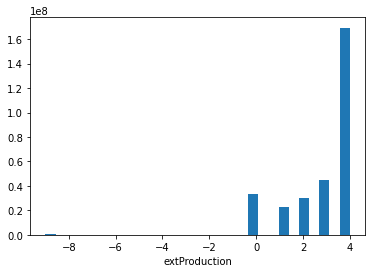

In [7]:
mplot.hist(SG_bdf, bins=30)
mplot.xlabel('extProduction')

Text(0, 0.5, 'FLUX_RADIUS_R')

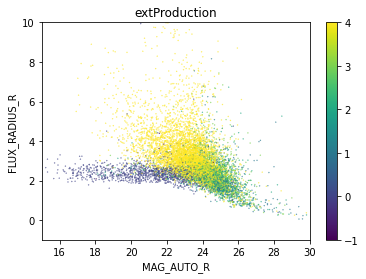

In [10]:
mplot.scatter(MAG[ids[:10000]], SIZE[ids[:10000]], c=SG_bdf[ids[:10000]],s=0.1)
mplot.xlim(15, 30)
mplot.ylim(-1,10)
mplot.clim(-1,4)
mplot.colorbar()
mplot.title('extProduction')
mplot.xlabel('MAG_AUTO_R')
mplot.ylabel('FLUX_RADIUS_R')


Text(0.5, 1.0, 'WAVG')

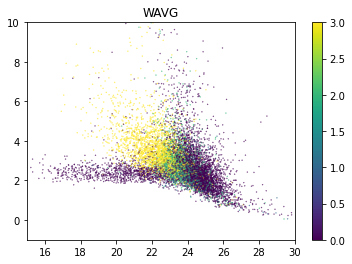

In [11]:
mplot.scatter(MAG[ids[:10000]], SIZE[ids[:10000]], c=SG_wavg[ids[:10000]],s=0.1)
mplot.xlim(15, 30)
mplot.ylim(-1,10)
mplot.colorbar()
mplot.title('WAVG')

Text(0, 0.5, 'FLUX_RADIUS_R')

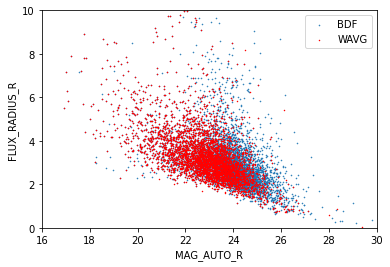

In [12]:
mask1 = (SG_bdf[ids[:10000]]>=3)
mplot.scatter(MAG[ids[:10000]][mask1], SIZE[ids[:10000]][mask1],s=0.3, label='BDF')
mask2 = (SG_wavg[ids[:10000]]>=2)
mplot.scatter(MAG[ids[:10000]][mask2], SIZE[ids[:10000]][mask2],s=0.3, c='r', label='WAVG', marker='x')

mplot.xlim(16, 30)
mplot.ylim(0,10)
mplot.legend()

mplot.xlabel('MAG_AUTO_R')
mplot.ylabel('FLUX_RADIUS_R')


In [56]:
len(MAG)

11880000